# This notebook is used to explore the datasets

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Load data
netflix = pd.read_csv('Data/netflix_titles.csv')
prime = pd.read_csv('Data/amazon_prime_titles.csv')
disney = pd.read_csv('Data/disney_plus_titles.csv')
hulu = pd.read_csv('Data/hulu_titles.csv')
platforms = pd.read_csv('Data/MoviesOnStreamingPlatforms.csv')

In [3]:
# Overview of individual dataframe
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [4]:
# Overview of individual dataframe
disney.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!


In [5]:
# Overview of individual datafra
hulu.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...


In [6]:
# Overview of individual datafr
prime.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6117,s6118,Movie,Parts of the Same Circle,"Denny Hironaga, Eric Nemoto","Jim Tharp, Allan Okubo, Dann Seki, Keith Kashi...",NaN,NaN,2012,13+,120 min,"Drama, Special Interest",Death not being apart from life but rather an ...
6390,s6391,Movie,Lila Lila,Alain Gsponer,"Daniel Bruhl, Hannah Hurzsprung, Kristen Block",NaN,NaN,2010,16+,107 min,"Comedy, Drama","David, a waiter, finds an unpublished manuscri..."
1841,s1842,TV Show,Little Dorrit,NaN,"Claire Foy, Matthew Macfadyen, Tom Courtenay, ...",NaN,NaN,2008,TV-PG,1 Season,"Drama, Historical",This gripping series by Andrew Davies brings t...
3629,s3630,Movie,Inside Out,David Ogden,"Eriq La Salle, Steven Weber, Kate Walsh, Russe...",NaN,NaN,2005,16+,95 min,Suspense,When an enigmatic psychiatrist moves into a su...
6241,s6242,Movie,Female Agents,Jean-Paul Salomé,"Sophie Marceau, Julie Depardieu, Déborah Franç...",NaN,NaN,2008,16+,112 min,"Action, Drama",May 1944. A five-woman commando unit parachute...
5186,s5187,Movie,Fun Play Vehicles For Kids - Gecko's Real Vehi...,Christian Hughes,NaN,NaN,NaN,2019,ALL,46 min,Kids,Join Gecko in his vehicle-based educational co...
1781,s1782,TV Show,Mad About You,NaN,"Paul Reiser, Helen Hunt, John Pankow, Richard ...",NaN,NaN,2019,TV-PG,1 Season,Comedy,"A revival of the 1990s sitcom, Mad About You c..."
2661,s2662,TV Show,Dilruk Jayasinha: Bundle of Joy,NaN,Dilruk Jayasinha,NaN,NaN,2020,16+,1 Season,"Arts, Entertainment, and Culture",Sri Lankan-born Dilruk Jayasinha is one of the...
2888,s2889,TV Show,Chacha Vidhayak Hain Humare,NaN,"Zakir Khan, Vyom Sharma, Kumar Varun, Zakir Hu...",NaN,"March 30, 2021",2021,13+,2 Seasons,"Comedy, Drama","Ronny's lie of working for his 'Chacha', the M..."
3279,s3280,Movie,American Flag for Kids,Mark Knight,NaN,NaN,NaN,2019,ALL,60 min,"Documentary, Special Interest",The American flag proudly waves atop Chimney R...


In [7]:
print('The amount of titles per platform')
print('netflix:',netflix.shape[0])
print('prime:',prime.shape[0])
print('disney:',disney.shape[0])
print('hulu:',hulu.shape[0])

The amount of titles per platform
netflix: 8807
prime: 9668
disney: 1450
hulu: 3073


In [8]:
# Overview of the platform dataframe
platforms

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [9]:
def top_in_attr(dataframe, attribute, count=10):
    df_temp = dataframe.groupby(attribute).count()[['show_id']]
    df_temp.columns = ['count']
    return df_temp.sort_values('count',ascending=False).head(count)

In [10]:
# top 10 netflix directors by count
top_in_attr(netflix,'director')

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12


In [11]:
# Share of Movies vs TV-shows in netflix
top_in_attr(netflix,'type')

,count
type,
Movie,6131
TV Show,2676


In [12]:
top_in_attr(netflix,'country')

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [13]:
top_in_attr(netflix,'release_year')

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


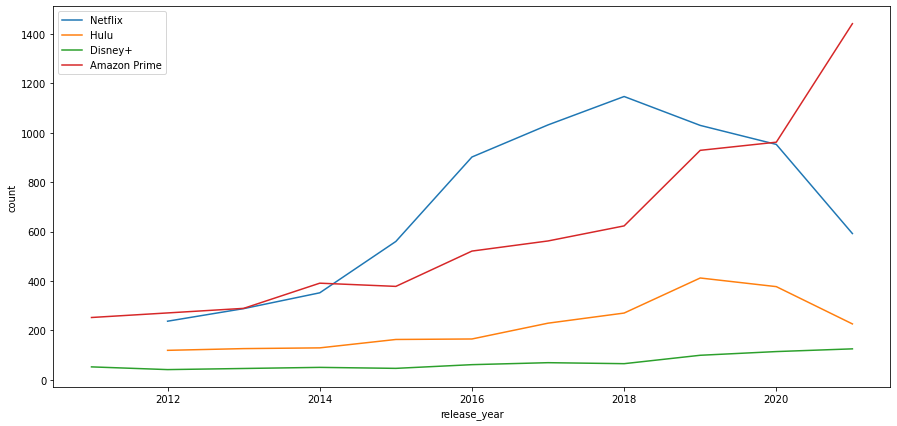

In [14]:
a = top_in_attr(netflix,'release_year')
b = top_in_attr(hulu,'release_year')
c = top_in_attr(disney,'release_year')
d = top_in_attr(prime,'release_year')
plt.figure(figsize=(15, 7))
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=a,
                            legend="brief",
                            label='Netflix')
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=b,
                            label='Hulu',
                            legend="brief")
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=c,
                            label='Disney+',
                            legend="brief")
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=d,
                            label='Amazon Prime',
                            legend="brief")
#plt.legend()
#plt.show()
plt.savefig("Releases_per_year.png")

In [15]:
top_in_attr(netflix,'rating')

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [21]:
#Merge together all datasets of netflix, prime, disney and hulu
all_streams=pd.concat([netflix,prime,disney,hulu], keys=['Netflix', 'Prime','Disney','Hulu']).reset_index()
all_streams.sample(10)

,level_0,level_1,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
11042,Prime,2235,s2236,Movie,Hearts in Bondage,Lew Ayres,"James Dunn, Mae Clarke, David Manners, Charlot...",NaN,NaN,1936,NR,99 min,"Action, Military and War","A historical account, with fictional character..."
14155,Prime,5348,s5349,Movie,Psychophony,Xabier Berraondo,"Claudia Pons, Tania Sarrias, Miriam Planas Fer...",NaN,NaN,2011,16+,80 min,"Drama, Horror, Suspense",Dr Helena Jara begins an experiment with sever...
13688,Prime,4881,s4882,Movie,History of a Scoundrel,Julio Bracho,"Fernando Soler, Amparo Rivelles, Julio Alemán",NaN,NaN,1963,13+,89 min,Drama,A drama that tells the story of how Lina is ac...
19377,Disney,902,s903,Movie,Frenemies,Daisy Mayer,"Zendaya , Bella Thorne, Mary Mouser, Nick Robi...",United States,"November 12, 2019",2012,TV-G,88 min,"Anthology, Comedy, Coming of Age",Three very different sets of friends experienc...
12220,Prime,3413,s3414,Movie,A Haunting on Potter Street,Steven T. Shippy,"Steven T. Shippy, Prozak, Brian Harnois, Adam ...",NaN,NaN,2012,13+,77 min,"Drama, Horror","For the first time in history, a documentary f..."
14868,Prime,6061,s6062,Movie,Dave Helem: DJ The Chicago Kid,Brian Volk-Weiss,Dave Helem,NaN,NaN,2021,18+,61 min,"Arts, Entertainment, and Culture, Comedy, Spec...",DJ the Chicago Kid is an hour-long roller coas...
18661,Disney,186,s187,Movie,The Sandlot 2,David Mickey Evans,"Max Lloyd-Jones, James Willson, Samantha Burto...",United States,"July 2, 2021",2005,PG,98 min,"Comedy, Sports","10 years after the events at The Sandlot, a te..."
15062,Prime,6255,s6256,Movie,Beyond The Purple Hills,John English,"Gene Autry, Champion, Jo-Carroll Dennison",NaN,NaN,1950,16+,70 min,Western,Gene Autry becomes the new Sheriff after bank ...
21784,Hulu,1859,s1860,TV Show,Serie Pokémon XY – Expediciones en Kalos,NaN,NaN,NaN,"January 31, 2020",2015,NaN,1 Season,"Anime, Kids",¡Ash y Pikachu continúan con su viaje épico en...
10071,Prime,1264,s1265,TV Show,Primal Grill with Steven Raichlen,NaN,Steven Raichlen,NaN,NaN,2010,TV-G,1 Season,Special Interest,Global grilling authority Steven Raichlen retu...


In [19]:
cast = all_streams[["level_0","cast"]]
cast=cast.rename(columns={"level_0":"service"})
cast["cast"] = cast["cast"].str.split(",")
cast = cast.explode("cast")
cast["cast"] = cast["cast"].str.strip()
cnt = cast.value_counts().reset_index()
cnt = cnt.rename(columns={0:"cnt"})
cnt.to_csv("Data/cast_per_platform.csv")
cnt.head(5)

,service,cast,cnt
0,Prime,Maggie Binkley,56
1,Netflix,Anupam Kher,43
2,Netflix,Shah Rukh Khan,35
3,Prime,1,35
4,Netflix,Julie Tejwani,33


0          netflix - Movie
1        netflix - TV Show
2        netflix - TV Show
3        netflix - TV Show
4        netflix - TV Show
               ...        
22993       hulu - TV Show
22994       hulu - TV Show
22995       hulu - TV Show
22996       hulu - TV Show
22997       hulu - TV Show
Length: 22998, dtype: object


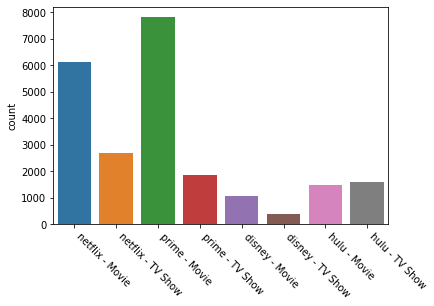

In [17]:
df = all_streams["level_0"] + " - " + all_streams["type"]
print(df)
sns.countplot(x=df.array)
plt.xticks(rotation=-45, ha="left")
plt.savefig("Amount_of_content.png",dpi=600, bbox_inches = "tight")

### Adding information from IMDb

In [18]:
all_rated = pd.read_csv("Data/all_IMDB_rated.csv")
all_rated.sample(2)

,level_0,level_1,show_id,type,title,director,cast,country,date_added,release_year,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
686,netflix,609,s610,Movie,The Tourist,Florian Henckel von Donnersmarck,"Angelina Jolie, Johnny Depp, Paul Bettany, Tim...","United States, France, Italy, United Kingdom","July 1, 2021",2010,...,tvEpisode,The Tourist,The Tourist,0,2010,\N,\N,Documentary,NaN,NaN
13509,prime,6883,s6884,Movie,Namma Oorukku Ennadhan Achu,Nal. Senthilkumar,"Mahendran, Miyasree Sowmya",NaN,NaN,2021,...,movie,Namma Oorukku Ennadhan Achu,Namma Oorukku Ennadhan Achu,0,2021,\N,110,"Action,Drama,Romance",4.9,24.0


0          netflix - Movie
1        netflix - TV Show
2        netflix - TV Show
3        netflix - TV Show
4        netflix - TV Show
               ...        
20942       hulu - TV Show
20943       hulu - TV Show
20944       hulu - TV Show
20945       hulu - TV Show
20946       hulu - TV Show
Length: 20947, dtype: object


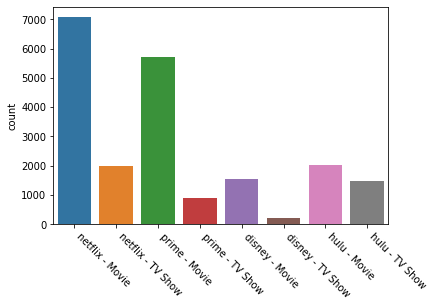

In [19]:
df = all_rated["level_0"] + " - " + all_rated["type"]
print(df)
sns.countplot(x=df.array)
plt.xticks(rotation=-45, ha="left")
plt.savefig("Amount_of_content.png",dpi=600, bbox_inches = "tight")

In [20]:
imdb = pd.read_csv("Data/title.basics.tsv", sep="\t",low_memory=False)
imdb.shape

(8830142, 9)

In [21]:
all_streams_imdb=pd.merge(all_streams,imdb,left_on=["title"],right_on=["originalTitle"],how='left')
all_streams_imdb.shape

(176316, 23)

In [22]:
all_streams_imdb=all_streams_imdb[all_streams_imdb["startYear"].astype("string")==all_streams_imdb["release_year"].astype("string")]
all_streams_imdb.shape

(20947, 23)

In [23]:
all_streams_imdb.sample(5)

,level_0,level_1,show_id,type,title,director,cast,country,date_added,release_year,...,description,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
162648,hulu,1381,s1382,TV Show,I Can See Your Voice,NaN,NaN,NaN,"September 24, 2020",2020,...,Actress Cheryl Hines and vocalist Adrienne Bai...,tt11710130,tvSeries,I Can See Your Voice,I Can See Your Voice,0,2020,\N,44,"Game-Show,Music"
134528,prime,9107,s9108,Movie,Scorpio,Michael Winner,"Burt Lancaster, Alain Delon, Paul Scofield, Jo...",NaN,NaN,1973,...,In a chilling scenario of international espion...,tt0070653,movie,Scorpio,Scorpio,0,1973,\N,114,"Action,Drama,Thriller"
99876,prime,4837,s4838,Movie,Lavell Crawford: Home for the Holidays,Brian Volk-Weiss,Lavell Crawford,NaN,NaN,2017,...,Lavell Crawford is home for the holidays in hi...,tt7265806,tvSpecial,Lavell Crawford: Home for the Holidays,Lavell Crawford: Home for the Holidays,0,2017,\N,58,Comedy
169412,hulu,2244,s2245,TV Show,The Act,NaN,NaN,United States,"March 20, 2019",2019,...,"The Act follows Gypsy Blanchard, a girl trying...",tt8682948,tvMiniSeries,The Act,The Act,0,2019,2019,60,"Biography,Crime,Drama"
1541,netflix,171,s172,Movie,Same Kind of Different as Me,Michael Carney,"Greg Kinnear, Renée Zellweger, Djimon Hounsou,...",United States,"September 1, 2021",2017,...,A wealthy couple whose marriage is on the rock...,tt1230168,movie,Same Kind of Different as Me,Same Kind of Different as Me,0,2017,\N,119,"Biography,Drama"


In [24]:
rating = pd.read_csv('Data/title.ratings.tsv', sep="\t")

In [25]:
all_rated=pd.merge(all_streams_imdb,rating,on="tconst",how="left")

In [26]:
all_rated.to_csv("Data/all_IMDB_rated.csv",index=False)

### Using the merged dataset

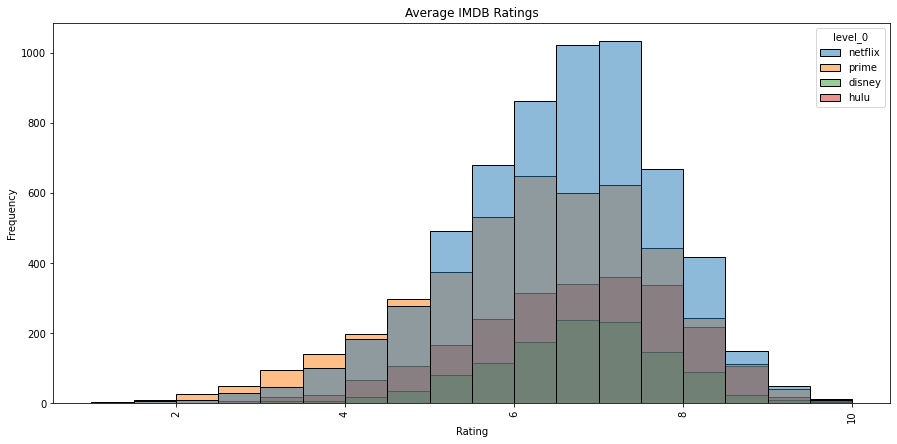

In [27]:
ratings = all_rated[["level_0","averageRating"]]

plt.figure(figsize=(15, 7))
sns.histplot(data=ratings,binwidth=0.5,x="averageRating",hue="level_0",)
plt.title('Average IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [20]:
# The unique categories of netflix
netflix_categories = netflix['listed_in'].str.split(', ').explode('listed_in').unique()
netflix_categories

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [21]:
# categories grouped
def get_cat(df, number=20):
    a = df['listed_in'].str.split(', ').explode('listed_in')
    b = pd.DataFrame(a.groupby(a).count())
    b.columns = ['count']
    b['category'] = b.index
    return b.sort_values('count', ascending=False)[:number]

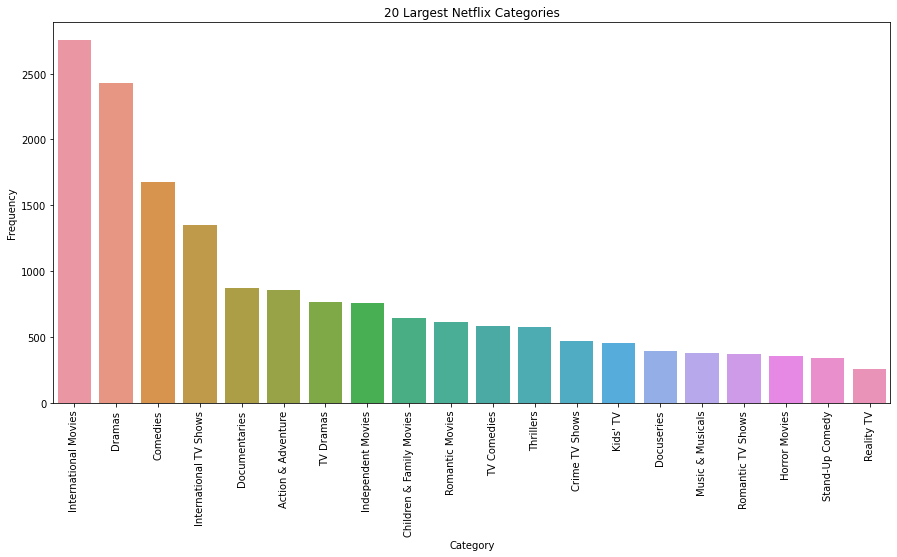

In [31]:
plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='count', data=get_cat(netflix))
plt.title('20 Largest Netflix Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.savefig('20_Largest_Netflix_Categories.png')
plt.show()

In [23]:
net_a = get_cat(netflix, 30)
pr_a = get_cat(prime, 30)
hul_a = get_cat(hulu, 30)
dis_a = get_cat(disney, 30)

In [24]:
net_a

,count,category
listed_in,,
International Movies,2752,International Movies
Dramas,2427,Dramas
Comedies,1674,Comedies
International TV Shows,1351,International TV Shows
Documentaries,869,Documentaries
Action & Adventure,859,Action & Adventure
TV Dramas,763,TV Dramas
Independent Movies,756,Independent Movies
Children & Family Movies,641,Children & Family Movies


In [25]:
net_a['provider'] = 'Netflix'
pr_a['provider'] = 'Prime'
hul_a['provider'] = 'Hulu'
dis_a['provider'] = 'Disney'

In [26]:
big_cat = pd.concat((net_a, pr_a, hul_a, dis_a))

In [28]:
import plotly.express as px
fig = px.treemap(big_cat, path=['provider', 'category'], values='count')
fig.show()